In [1]:
from tensorflow import keras

import math
import numpy as np

# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')

Data created successfully


In [23]:
x_data.shape

(1000,)

In [2]:
mse_hist =[]
for i in range(1,10):
    m = keras.Sequential()
    m.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
    m.add(keras.layers.Dense(units = i*100, activation = 'relu'))
    m.add(keras.layers.Dense(units = 1, activation = 'linear'))
    m.compile(loss='mse', optimizer="adam")
    mod = m.fit( x_data, y_data, epochs=100, verbose=0) 
    print('hidden layer unit : ',i*100)
    print(mod.history['loss'][99])
    mse_hist.append(mod.history['loss'][99])

hidden layer unit :  100
0.05352524667978287
hidden layer unit :  200
0.025154322385787964
hidden layer unit :  300
0.021215662360191345
hidden layer unit :  400
0.019655410200357437
hidden layer unit :  500
0.023156899958848953
hidden layer unit :  600
0.0186989177018404
hidden layer unit :  700
0.022092582657933235
hidden layer unit :  800
0.01966738887131214
hidden layer unit :  900
0.021057775244116783


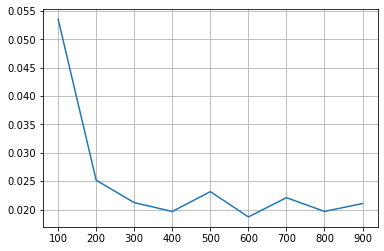

In [4]:
import matplotlib.pyplot as plt
# Display the result
plt.plot([100,200,300,400,500,600,700,800,900],mse_hist)
plt.grid()
plt.show()

In [22]:
mse_hist =[]
for i in range(1,10):
    m = keras.Sequential()
    m.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
    for j in range(i):
        m.add(keras.layers.Dense(units = 400, activation = 'relu'))    
    m.add(keras.layers.Dense(units = 1, activation = 'linear'))
    m.compile(loss='mse', optimizer="adam")
    mod = m.fit( x_data, y_data, epochs=100, verbose=0) 
    print('hidden layer : ',i)
    print(mod.history['loss'][99])
    mse_hist.append(mod.history['loss'][99])

hidden layer :  1
0.02195301279425621
hidden layer :  2
0.013156426139175892
hidden layer :  3
0.012955128215253353
hidden layer :  4
0.015271118842065334
hidden layer :  5
0.014223752543330193
hidden layer :  6
0.013200012035667896
hidden layer :  7
0.014834819361567497
hidden layer :  8
0.014081877656280994
hidden layer :  9
0.014096724800765514


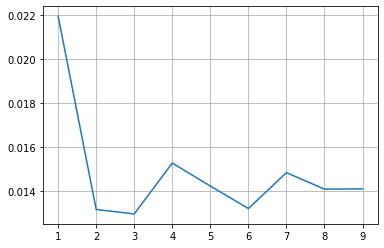

In [24]:
import matplotlib.pyplot as plt
# Display the result
plt.plot([i for i in range(1,10)],mse_hist)
plt.grid()
plt.show()

In [25]:
m = keras.Sequential()
m.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
for j in range(3):
    m.add(keras.layers.Dense(units = 400, activation = 'relu'))    
m.add(keras.layers.Dense(units = 1, activation = 'linear'))
m.compile(loss='mse', optimizer="adam")
mod = m.fit( x_data, y_data, epochs=100, verbose=0) 
print('4 hidden layers with 400 units each')
print('loss',mod.history['loss'][99])

4 hidden layers with 400 units each
loss 0.01231289654970169


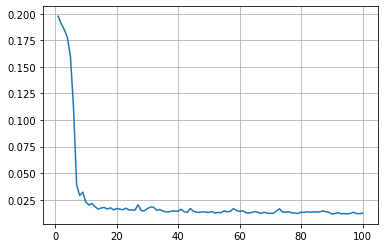

In [26]:
import matplotlib.pyplot as plt
# Display the result
plt.plot([i for i in range(1,101)],mod.history['loss'])
plt.grid()
plt.show()

In [27]:
m = keras.Sequential()
m.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
for j in range(4):
    m.add(keras.layers.Dense(units = 400, activation = 'relu'))    
m.add(keras.layers.Dense(units = 1, activation = 'linear'))
m.compile(loss='mse', optimizer="adam")
mod = m.fit( x_data, y_data, epochs=20, verbose=0) 
print('3 hidden layers with 400 units each')
print('loss',mod.history['loss'][19])

3 hidden layers with 400 units each
loss 0.015521025285124779


### Données en 2 dimensions

In [149]:
x1_data = np.linspace(-10, 10, num=1000)
x2_data = np.linspace(-10, 10, num=1000)
x_data = np.array([x1_data,x2_data]).T

In [150]:
x_data

array([[-10.        , -10.        ],
       [ -9.97997998,  -9.97997998],
       [ -9.95995996,  -9.95995996],
       ...,
       [  9.95995996,   9.95995996],
       [  9.97997998,   9.97997998],
       [ 10.        ,  10.        ]])

In [151]:
import pandas as pd
x_data = pd.DataFrame(x_data)

In [152]:
y_data = 0.1*(x_data[0]+x_data[1])*np.cos(x_data[0]+x_data[1]) + 0.1*np.random.normal(size=1000)

In [162]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=[2]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 2)                 6         
_________________________________________________________________
dense_293 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_294 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_295 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_296 (Dense)            (None, 1)                 65        
Total params: 8,583
Trainable params: 8,583
Non-trainable params: 0
_________________________________________________________________


In [1]:
# Training
mod = model.fit( x_data, y_data, epochs=500, verbose=1)

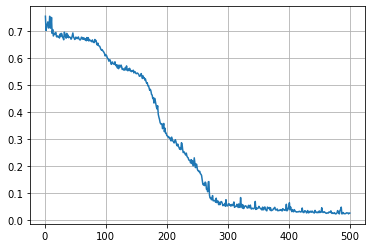

In [165]:
# Display the result
plt.plot([i for i in range(1,501)],mod.history['loss'])
plt.grid()
plt.show()

In [169]:
# Compute the output 
y_predicted = model.predict(x_data)

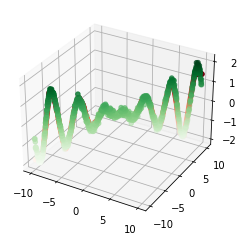

In [170]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_data[0], x_data[1], y_data, c=y_data, cmap='Greens');
ax.scatter3D(x_data[0], x_data[1], y_predicted, c=y_predicted, cmap='Reds');

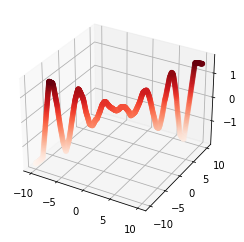

In [168]:
ax1 = plt.axes(projection='3d')
ax1.scatter3D(x_data[0], x_data[1], y_predicted, c=y_predicted, cmap='Reds');

In [171]:
np.mean([(y_data[i]-y_predicted[i])**2 for i in range(1000)])

0.024738936